In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [18]:
df = pd.read_csv('insurance.csv')
df.shape

(1338, 7)

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [23]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [22]:
fig = px.histogram(df,
                   x='age',
                   nbins=47,
                   marginal='box',
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [26]:
#Distribution of BMI
BMI_fig = px.histogram(df,
                       x='bmi',
                       marginal='box',
                       nbins=39,
                       title='Distribution of BMI')
BMI_fig.update_layout(bargap=0.1)
BMI_fig.show()

In [27]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [33]:
# Distribution of Charges
charges_fig = px.histogram(df,
                           x='charges',
                           marginal='box',
                           color='smoker',
                           color_discrete_sequence=['red','green'],
                           title='Distribution of Charges')
charges_fig.update_layout(bargap=0.1)
charges_fig.show()

In [36]:
# Distribution based on the Sex
sex_fig = px.histogram(df,
                       x='charges',
                       color='sex',
                       marginal='box',
                       title='Distribution based on Sex')
sex_fig.update_layout(bargap=0.1)
sex_fig.show()

In [40]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [38]:
# smoker data visualization based on sex
smoke_fig = px.histogram(df,
                         x='smoker',
                         color='sex',
                         title='Smoker')
smoke_fig.update_layout(bargap=0.1)
smoke_fig.show()

## Visualization between Age and Charges

In [47]:
fig = px.scatter(df,
                 x='age',
                 y='charges',
                 color='smoker',
                 hover_data='sex',
                 title='Relationship between Age and Charges'
                 )
fig.update_traces(marker_size=5)
fig.show()

## Relationship between BMI and Charges

In [52]:
fig = px.scatter(df,
                 x='bmi',
                 y='charges',
                 opacity=0.8,
                 hover_data='sex',
                 color='smoker')
fig.update_traces(marker_size=5)
fig.show()

In [53]:
px.violin(df, x='children', y='charges')

## Finding Correlation

In [54]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
df.charges.corr(df.age), df.charges.corr(df.bmi), df.charges.corr(df.children)
# df.charges.corr(df.smoker) will not directly work because smoker column is non-numeric.
# Hence, we need to convert it to numerical form first

(0.2990081933306478, 0.19834096883362887, 0.06799822684790487)

In [66]:
numeric_smoker = (df['smoker']=='yes').astype(int)
df['numeric_smoker'] = numeric_smoker
df.head()

,age,sex,bmi,children,smoker,region,charges,numeric_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [67]:
df.charges.corr(df.numeric_smoker)

0.7872514304984778

In [71]:
df.corr(numeric_only=True)

,age,bmi,children,charges,numeric_smoker
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
numeric_smoker,-0.025019,0.003750,0.007673,0.787251,1.000000


### Correlation is usually visualized through heatmap

Text(0.5, 1.0, 'Correlation Matrix')

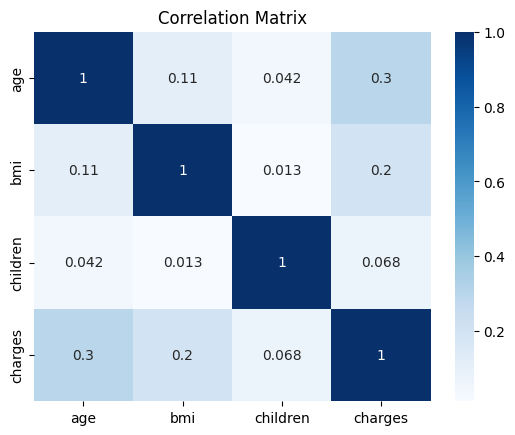

In [79]:
df = df.drop('numeric_smoker',axis=1)
sns.heatmap(df.corr(numeric_only=True), cmap='Blues', annot=True)
plt.title('Correlation Matrix')